<a href="https://colab.research.google.com/github/Denis-Yen/DataScience/blob/main/4_RegresionLogistica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regresión Logística

## Las tabals de contigencia

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression 

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Machine en Python  Udemy/Data/Gender Purchase.csv")
df.head()


,Gender,Purchase
0,Female,Yes
1,Female,Yes
2,Female,No
3,Male,No
4,Male,Yes


In [ ]:
contigence_table = pd.crosstab(df["Gender"], df["Purchase"])
contigence_table # Tabla cruzada

Purchase,No,Yes
Gender,,
Female,106,159
Male,125,121


In [ ]:
contigence_table.sum(axis=1) # Suma por columnas
#contigence_table.sum(axis=0) # Suma por filas


In [ ]:
# Proporción con respecto a la suma por filas
contigence_table.astype("float").div(contigence_table.sum(axis=0))

### Probabilidad Condicional

* ¿cual es la propabilidad de que un cliente compre un producto sabiendo que es un hombre?
* ¿cual es la propabilidad de que sabiendo que un cliente compra un producto , este sea mujer?


In [ ]:
from IPython.display import display, Math, Latex

In [ ]:
display(Math(r'P(Purchase|Male = \frac{Número\ total\ de\ compras\ hechas\ por\ hombres}{Numero\ total\ de\ hombres\ del\ grupo} = \frac{Female\cap Purchase}{Purchase}' ))

121/246

<IPython.core.display.Math object>

0.491869918699187

In [ ]:
display(Math(r'P(No Purchase|Male) = 1-P(Purchase|Male)'))
125/246

<IPython.core.display.Math object>

0.508130081300813

In [ ]:
display(Math(r'P(Purchase|Male = \frac{Número\ total\ de\ compras\ hechas\ por\ mujeres}{Numero\ total\ de\ compras} = \frac{Female\cap Purchase}{Purchase}' ))
159/280

<IPython.core.display.Math object>

0.491869918699187

In [ ]:
display(Math(r'P(Male|Purchase)'))
125/246

<IPython.core.display.Math object>

0.508130081300813

In [ ]:
display(Math(r'P(Purchase|Male)'))
print(121/246)
display(Math(r'P(No \Purchase|Male)'))
print(125/246)
display(Math(r'P(Purchase|Female)'))
print(159/265)
display(Math(r'P(No\ Purchase|Female)'))
print(106/265)


<IPython.core.display.Math object>

0.491869918699187


<IPython.core.display.Math object>

0.508130081300813


<IPython.core.display.Math object>

0.6


<IPython.core.display.Math object>

0.4


## Ratio de probabilidades


In [ ]:
display(Math(r'P_m = \ probabilidad\ de\ hacer\ compra\ sabiendo\ que\ es \ un \ hombre'))

display(Math(r'P_f = \ probabilidad\ de\ hacer\ compra\ sabiendo\ que\ es \ una\ mujer'))

display(Math(r'odds\in[0,+\infty]'))

display(Math(r'odds_{purchase,male} = \frac{P_m}{1-P_m} = \frac{N_{p,m}}{N_{\bar p, m}}'))

display(Math(r'odds_{purchase,female} = \frac{P_F}{1-P_F} = \frac{N_{p,f}}{N_{\bar p, f}}'))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [ ]:
pm = 121/246
pf = 159/265
odds_m = pm/(1-pm)# 121/125
odds_f = pf/(1-pf)# 159/106

In [ ]:
odds_m, odds_f

(0.9680000000000002, 1.4999999999999998)


* Si el ratio es superior a 1, es más probable el éxito que el fracaso. Cuanto mayor es el ratio, más probabilidad de éxito en nuestro suceso.
* Si el ratio es exactamente igual a 1, éxito y fracaso son equiprobables (p=0.5)
* Si el ratio es menor que 1, el fracaso es más probable que el éxito. Cuanto menor es el ratio, menor es la probabilidad de éxito del suceso.

In [ ]:
display(Math(r'odds_{ratio} = \frac{odds_{purchase,male}}{odds_{purchase,female}}'))

<IPython.core.display.Math object>

In [ ]:
odds_r = odds_m/odds_f
odds_r


0.6453333333333335

In [ ]:
1/odds_r # odds_f/odds_m

1.5495867768595037

# Implementaciones del método de maxima verosimilitud para regresión lineal

## Definir la función de entorno L(b)
$L(\beta)=\sum_{i=1}^n P_i^{y_i}(1-Pi)^{y_i}$

In [ ]:
def likelihood(y, pi):
    import numpy as np
    total_sum = 1
    sum_in = list(range(1, len(y)+1))
    for i in range(len(y)):
        sum_in[i] = np.where(y[i]==1, pi[i], 1-pi[i])
        total_sum = total_sum * sum_in[i]
    return total_sum

## Calcular las probabilidades para cada observación

$P_i = P(x_i) = \frac{1}{1+e^{-\sum_{j=0}^k\beta_j\cdot x_{ij}}}$


In [ ]:
def logitprobs(X,beta):
    import numpy as np
    n_rows = np.shape(X)[0]
    n_cols = np.shape(X)[1]
    pi=list(range(1,n_rows+1))
    expon=list(range(1,n_rows+1))
    for i in range(n_rows):
        expon[i] = 0
        for j in range(n_cols):
            ex=X[i][j] * beta[j]
            expon[i] = ex + expon[i]
        with np.errstate(divide="ignore", invalid="ignore"):
            pi[i]=1/(1+np.exp(-expon[i]))
    return pi

## Calcular la matriz diagonal W

$W= diag(P_i \cdot (1-P_i))_{i=1}^n$

In [ ]:
def findW(pi):
    import numpy as np
    n = len(pi)
    W = np.zeros(n*n).reshape(n,n)
    for i in range(n):
        print(i)
        W[i,i]=pi[i]*(1-pi[i])
        W[i,i].astype(float)
    return W

## Obtener la solución de la función logística
$\beta_{n+1} = \beta_n -\frac{f(\beta_n)}{f'(\beta_n)}$

$f(\beta) = X(Y-P)$

$f'(\beta) = XWX^T$


In [ ]:
def logistics(X, Y, limit):
    import numpy as np
    from numpy import linalg
    nrow = np.shape(X)[0]
    bias = np.ones(nrow).reshape(nrow,1)
    X_new = np.append(X, bias, axis = 1)
    ncol = np.shape(X_new)[1]
    beta = np.zeros(ncol).reshape(ncol,1)
    root_dif = np.array(range(1,ncol+1)).reshape(ncol,1)
    iter_i = 10000
    while(iter_i>limit):
        print("Iter:i"+str(iter_i) + ", limit:" + str(limit))
        pi = logitprobs(X_new, beta)
        print("Pi:"+str(pi))
        W = findW(pi)
        print("W:"+str(W))
        num = (np.transpose(np.matrix(X_new))*np.matrix(Y - np.transpose(pi)).transpose())
        den = (np.matrix(np.transpose(X_new))*np.matrix(W)*np.matrix(X_new))
        root_dif = np.array(linalg.inv(den)*num)
        beta = beta + root_dif
        print("Beta: "+str(beta))
        iter_i = np.sum(root_dif*root_dif)
        ll = likelihood(Y, pi)
    return beta

## Comprobación experimental

In [ ]:
 import numpy as np

In [ ]:
  X = np.array(range(10)).reshape(10,1)
  X

In [ ]:
Y = [0,0,0,0,1,0,1,0,1,1]
Y

In [ ]:
bias = np.ones(10).reshape(10,1)
X_new = np.append(X, bias, axis = 1)
X_new

In [ ]:
a = logistics(X,Y, 0.0001)

Iter:i10000, limit:0.0001
Pi:[array([0.5]), array([0.5]), array([0.5]), array([0.5]), array([0.5]), array([0.5]), array([0.5]), array([0.5]), array([0.5]), array([0.5])]
0
1
2
3
4
5
6
7
8
9
W:[[0.25 0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.25 0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.25 0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.25 0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.25 0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.25 0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.25 0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.25 0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.25 0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.25]]
Beta: [[ 0.43636364]
 [-2.36363636]]
Iter:i5.777190082644626, limit:0.0001
Pi:[array([0.08598797]), array([0.12705276]), array([0.18378532]), array([0.2583532]), array([0.35019508]), array([0.45467026]), array([0.56329497]), array([0.66616913]), array([0.75533524]), array([0.8

In [ ]:
ll = likelihood(Y, logitprobs(X,a))
a # Y = 0.66220827*-3.69557172

array([[ 0.66220827],
       [-3.69557172]])

#  Con el paquete stats de python

In [ ]:
import statsmodels.api as sm

In [ ]:
logit_model = sm.Logit(Y, X_new)

In [ ]:
result = logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.431012
         Iterations 6


In [ ]:
print(result.summary2()) # El summary 2 incluye los criterios AIC BIC 

                        Results: Logit
Model:              Logit            Pseudo R-squared: 0.360   
Dependent Variable: y                AIC:              12.6202 
Date:               2021-07-19 20:47 BIC:              13.2254 
No. Observations:   10               Log-Likelihood:   -4.3101 
Df Model:           1                LL-Null:          -6.7301 
Df Residuals:       8                LLR p-value:      0.027807
Converged:          1.0000           Scale:            1.0000  
No. Iterations:     6.0000                                     
-----------------------------------------------------------------
          Coef.    Std.Err.      z      P>|z|     [0.025   0.975]
-----------------------------------------------------------------
x1        0.6622     0.4001    1.6551   0.0979   -0.1220   1.4464
const    -3.6956     2.2889   -1.6145   0.1064   -8.1818   0.7906



# Regresión Logística aplicada a la banca

Se intentará predecir si se compra o no se compra un producto de inverción

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
import matplotlib.pyplot as plt


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Machine en Python  Udemy/Data/bank.csv", sep=";")
data.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
4114,30,admin.,married,basic.6y,no,yes,yes,cellular,jul,thu,53,1,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,no
4115,39,admin.,married,high.school,no,yes,no,telephone,jul,fri,219,1,999,0,nonexistent,1.4,93.918,-42.7,4.959,5228.1,no
4116,27,student,single,high.school,no,no,no,cellular,may,mon,64,2,999,1,failure,-1.8,92.893,-46.2,1.354,5099.1,no
4117,58,admin.,married,high.school,no,no,no,cellular,aug,fri,528,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
4118,34,management,single,high.school,no,yes,no,cellular,nov,wed,175,1,999,0,nonexistent,-0.1,93.200,-42.0,4.120,5195.8,no


In [ ]:
columns_names =  ['Edad', 'Trabajo', 'Civil', 'Educacion', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y']


In [ ]:
data.columns = columns_names
data.head()

,Edad,Trabajo,Civil,Educacion,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,487,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,346,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,227,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,17,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,58,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [ ]:
# Convertimos la variable target en binaria
data["y"] = np.where(data["y"]=="yes",1,0)

In [ ]:
# Recodificamos la variable educación
data["education"] = np.where(data["education"]=="basic.4y", "Basic",data["education"])
data["education"] = np.where(data["education"]=="basic.6y", "Basic",data["education"])
data["education"] = np.where(data["education"]=="basic.9y", "Basic",data["education"])

data["education"] = np.where(data["education"]=="high.school", "High School",data["education"])
data["education"] = np.where(data["education"]=="professional.course", "Professional Course",data["education"])
data["education"] = np.where(data["education"]=="university.degree", "University Degree",data["education"])

data["education"] = np.where(data["education"]=="illiterate", "Illiterate",data["education"])
data["education"] = np.where(data["education"]=="unknown", "Unknown",data["education"])


In [ ]:
data["education"].unique()

array(['Basic', 'High School', 'University Degree', 'Professional Course',
       'Unknown', 'Illiterate'], dtype=object)

## Análisis exploratorio de datos

In [ ]:
data["y"].value_counts()

0    3668
1     451
Name: y, dtype: int64

In [ ]:
data.groupby("y").mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
y,,,,,,,,,,
0,39.895311,219.40976,2.605780,982.763086,0.141767,0.240185,93.599677,-40.586723,3.802826,5175.502072
1,41.889135,560.78714,1.980044,778.722838,0.585366,-1.177384,93.417268,-39.786475,2.145448,5093.118625


In [ ]:
data.groupby("education").mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
education,,,,,,,,,,,
Basic,42.337124,253.898457,2.429732,978.815597,0.149472,0.237368,93.658600,-41.120552,3.775701,5174.133144,0.079610
High School,38.097720,258.534202,2.630836,958.022801,0.206298,-0.002497,93.564314,-40.995765,3.511732,5163.212595,0.105320
Illiterate,42.000000,146.000000,4.000000,999.000000,0.000000,-2.900000,92.201000,-31.400000,0.834000,5076.200000,0.000000
Professional Course,40.207477,278.816822,2.512150,958.211215,0.194393,0.163925,93.599630,-40.127664,3.701426,5167.595140,0.121495
University Degree,39.017405,247.707278,2.583070,947.900316,0.207278,-0.009731,93.499109,-39.830063,3.547132,5163.023180,0.130538
Unknown,42.826347,267.281437,2.538922,939.700599,0.263473,-0.074251,93.637455,-39.487425,3.410174,5151.260479,0.155689


Text(0, 0.5, 'Frecuencia de compra')

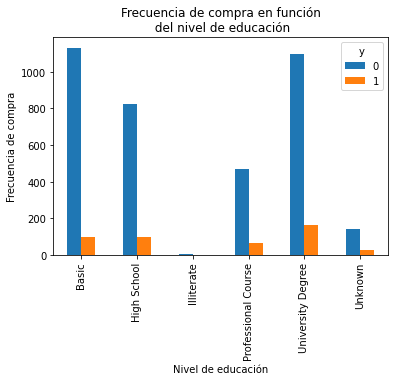

In [ ]:
%matplotlib inline
pd.crosstab(data.education, data.y).plot(kind = "bar")
plt.title("Frecuencia de compra en función\n del nivel de educación")
plt.xlabel("Nivel de educación")
plt.ylabel("Frecuencia de compra")

Se observa en el gráfico que las personas que mas compran son las que tienen el nivel universitario, por lo tanto seria un buen predictor.

Text(0, 0.5, 'Proporción de clientes')

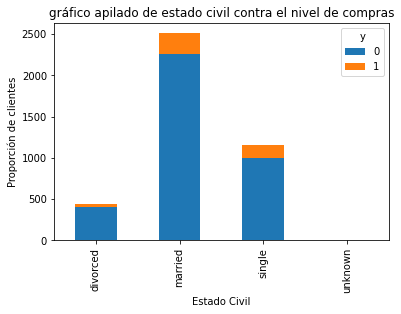

In [ ]:
table=pd.crosstab(data.marital, data.y)
table.plot(kind="bar", stacked = True) #stacked lo apila a las barras
plt.title("gráfico apilado de estado civil contra el nivel de compras")
plt.xlabel("Estado Civil")
plt.ylabel("Proporción de clientes")

Text(0, 0.5, 'Proporción de clientes')

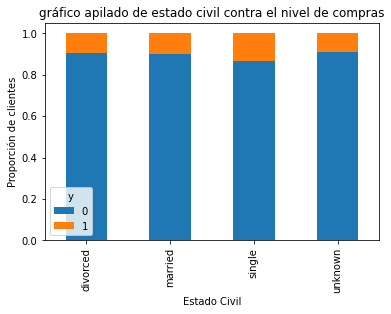

In [ ]:
table=pd.crosstab(data.marital, data.y)
table.div(table.sum(1).astype(float), axis =0).plot(kind = "bar", stacked = True)
plt.title("gráfico apilado de estado civil contra el nivel de compras")
plt.xlabel("Estado Civil")
plt.ylabel("Proporción de clientes")

Se observa del gráfico que el estado civil no es una variable que influya deamsiado en la compra

Text(0, 0.5, 'Frecuencia de compra dle producto')

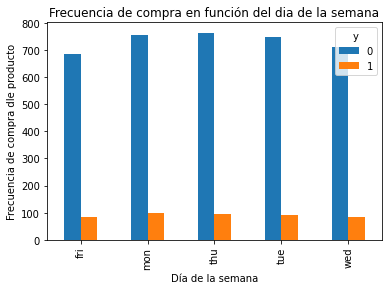

In [ ]:
table=pd.crosstab(data.day_of_week, data.y).plot(kind="bar")
plt.title("Frecuencia de compra en función del dia de la semana")
plt.xlabel("Día de la semana")
plt.ylabel("Frecuencia de compra dle producto")

Text(0, 0.5, 'Frecuencia de compra del producto')

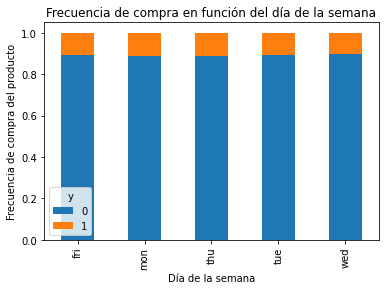

In [ ]:
table=pd.crosstab(data.day_of_week, data.y)
table.div(table.sum(1).astype(float), axis =0).plot(kind="bar", stacked = True)
plt.title("Frecuencia de compra en función del día de la semana")
plt.xlabel("Día de la semana")
plt.ylabel("Frecuencia de compra del producto")

El dia de la semana no influye en la venta del producto financiero, da igual vender lunes, martes , etc

Text(0, 0.5, 'Frecuencia de compra del producto')

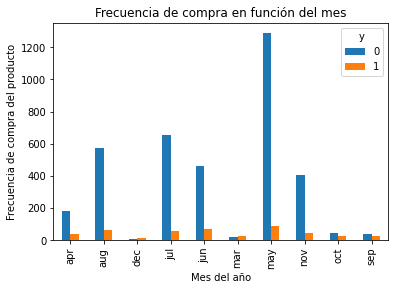

In [ ]:
table=pd.crosstab(data.month, data.y).plot(kind="bar")
plt.title("Frecuencia de compra en función del mes")
plt.xlabel("Mes del año")
plt.ylabel("Frecuencia de compra del producto")

Agosto, julio, junio, may, nov son los meses en que mas rechazo tiene el producto, puede ser un buen predictor.

Text(0, 0.5, 'Frecuencia de compra del producto')

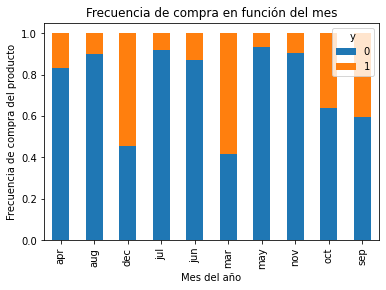

In [ ]:
table=pd.crosstab(data.month, data.y)
table.div(table.sum(1).astype(float), axis =0).plot(kind="bar", stacked = True)
plt.title("Frecuencia de compra en función del mes")
plt.xlabel("Mes del año")
plt.ylabel("Frecuencia de compra del producto")

Text(0.5, 0, 'Cliente')

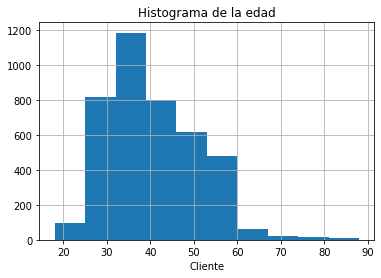

In [ ]:
%matplotlib inline
data.age.hist()
plt.title("Histograma de la edad")
plt.xlabel("Edad")
plt.xlabel("Cliente")

se observa que las personas entre 30 y 40 años estan dispuestos a invertir

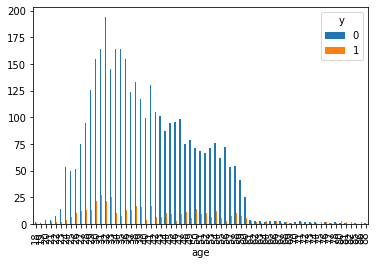

In [ ]:
pd.crosstab(data.age, data.y).plot(kind="bar")

Text(0.5, 0, 'Frecuncia de compra dle producto')

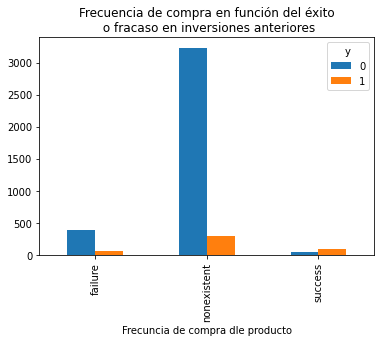

In [ ]:
pd.crosstab(data.poutcome, data.y).plot(kind ="bar")
plt.title("Frecuencia de compra en función del éxito\n o fracaso en inversiones anteriores")
plt.xlabel("Inversiones anteriores")
plt.xlabel("Frecuncia de compra dle producto")

Se observa que las personas que han tenido exito en inversiones anteriores son las que más compran.

## Selección de variables del dataset para el modelo logistico

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
import matplotlib.pyplot as plt

### Convertimos las variables categoricas a dummys



In [ ]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,Basic,no,yes,no,cellular,may,fri,487,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,0
1,39,services,single,High School,no,no,no,telephone,may,fri,346,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,0
2,25,services,married,High School,no,yes,no,telephone,jun,wed,227,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,0
3,38,services,married,Basic,no,unknown,unknown,telephone,jun,fri,17,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,0
4,47,admin.,married,University Degree,no,yes,no,cellular,nov,mon,58,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,0


In [ ]:
categories = ["job","marital", "education", "housing", "loan", "contact", "month", "day_of_week", "poutcome"]

for category in categories:
  cat_list = "cat"+"_"+category
  cat_dummies = pd.get_dummies(data[category], prefix=category)
  data_new = data.join(cat_dummies)
  data = data_new

In [ ]:
data_vars = data.columns.values.tolist()

In [ ]:
to_keep = [v for v in data_vars if v not in categories and v != 'default']
to_keep

['age',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed',
 'y',
 'job_admin.',
 'job_blue-collar',
 'job_entrepreneur',
 'job_housemaid',
 'job_management',
 'job_retired',
 'job_self-employed',
 'job_services',
 'job_student',
 'job_technician',
 'job_unemployed',
 'job_unknown',
 'marital_divorced',
 'marital_married',
 'marital_single',
 'marital_unknown',
 'education_Basic',
 'education_High School',
 'education_Illiterate',
 'education_Professional Course',
 'education_University Degree',
 'education_Unknown',
 'housing_no',
 'housing_unknown',
 'housing_yes',
 'loan_no',
 'loan_unknown',
 'loan_yes',
 'contact_cellular',
 'contact_telephone',
 'month_apr',
 'month_aug',
 'month_dec',
 'month_jul',
 'month_jun',
 'month_mar',
 'month_may',
 'month_nov',
 'month_oct',
 'month_sep',
 'day_of_week_fri',
 'day_of_week_mon',
 'day_of_week_thu',
 'day_of_week_tue',
 'day_of_week_wed',
 'poutcome_failure',

In [ ]:
bank_data = data[to_keep]
bank_data.columns.values

array(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_Basic', 'education_High School',
       'education_Illiterate', 'education_Professional Course',
       'education_University Degree', 'education_Unknown', 'housing_no',
       'housing_unknown', 'housing_yes', 'loan_no', 'loan_unknown',
       'loan_yes', 'contact_cellular', 'contact_telephone', 'month_apr',
       'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar',
       'month_may', 'month_nov', 'month_oct', 'month_sep',
       'day_of_week_fri', 'day_of_week_mon', 'day_of_week_thu',
       'd

In [ ]:
bank_data_vars = bank_data.columns.values.tolist()
Y = ['y']
X = [v for v in bank_data_vars if v not in Y]

### Selección de rasgos para el modelo

In [ ]:
n = 12

In [ ]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [ ]:
n = 12

In [ ]:
lr = LogisticRegression()

In [ ]:
rfe = RFE(lr, n)
rfe = rfe.fit(bank_data[X], bank_data[Y].values.ravel())

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [ ]:
print(rfe.support_)

[False False False False  True False False False  True False False False
 False False False  True False False False  True  True False False False
 False False False False False False False False False False False False
 False False False False False False  True  True  True  True  True False
 False False False False False False False  True False  True]


In [ ]:
rfe.ranking_

array([41, 39, 18, 45,  1, 17, 26, 22,  1, 35,  2,  8,  5, 38,  7,  1,  6,
       24, 43,  1,  1, 40, 15, 30, 27, 47, 31, 12, 46, 19, 28,  4,  9, 14,
       44, 13, 20, 33, 11,  3, 37, 21,  1,  1,  1,  1,  1, 23, 32, 42, 34,
       25, 29, 36, 10,  1, 16,  1])

In [ ]:
z = list(zip(bank_data_vars, rfe.support_, rfe.ranking_))
z


#### Selección de variables

In [ ]:
cols = [x for x in z if x[2]==1]
cols

[('previous', True, 1),
 ('euribor3m', True, 1),
 ('job_management', True, 1),
 ('job_student', True, 1),
 ('job_technician', True, 1),
 ('month_aug', True, 1),
 ('month_dec', True, 1),
 ('month_jul', True, 1),
 ('month_jun', True, 1),
 ('month_mar', True, 1),
 ('day_of_week_wed', True, 1),
 ('poutcome_nonexistent', True, 1)]

In [ ]:
# Otra forma de seleccionar las features 
cols=[]
for i in z:
  if i[2]==1:
    cols.append(i[0])

In [ ]:
cols = ["previous","euribor3m", "job_management", "job_student", "job_technician",
        "month_aug", "month_dec", "month_jul", "month_jun", "month_mar", "day_of_week_wed", "poutcome_nonexistent" ]

In [ ]:
X = bank_data[cols]
Y  = bank_data["y"]

## Implemetación del modelo en Python con statsmodel.api

In [ ]:
import statsmodels.api as sm

In [ ]:
logit_model = sm.Logit(Y, X)

In [ ]:
result = logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.293712
         Iterations 7


In [ ]:
result.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: Logit
=====================================================================
Model:                Logit             Pseudo R-squared:  0.150     
Dependent Variable:   y                 AIC:               2443.5982 
Date:                 2021-07-23 16:21  BIC:               2519.4786 
No. Observations:     4119              Log-Likelihood:    -1209.8   
Df Model:             11                LL-Null:           -1422.9   
Df Residuals:         4107              LLR p-value:       1.6266e-84
Converged:            1.0000            Scale:             1.0000    
No. Iterations:       7.0000                                         
---------------------------------------------------------------------
                      Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------------
previous             -0.1107   0.0696  -1.5901 0.1118 -0.2471  0.0257
euribor3m            -0.6072   0.0371 -16.3762 0.0000 -0.6799 -0.5346
job_management       -0.2794   0.2168  -1.2891 0.1974 -0.7043  0.1454
job_student          -0.2113   0.2955  -0.7150 0.4746 -0.7905  0.3679
job_technician        0.0413   0.1454   0.2842 0.7763 -0.2437  0.3264
month_aug             0.6548   0.1698   3.8567 0.0001  0.3220  0.9876
month_dec             1.1841   0.4473   2.6474 0.0081  0.3075  2.0608
month_jul             0.9980   0.1834   5.4412 0.0000  0.6385  1.3575
month_jun             1.0455   0.1695   6.1702 0.0000  0.7134  1.3777
month_mar             1.6392   0.3151   5.2028 0.0000  1.0217  2.2567
day_of_week_wed      -0.0805   0.1384  -0.5818 0.5607 -0.3517  0.1907
poutcome_nonexistent -0.7908   0.1218  -6.4938 0.0000 -1.0295 -0.5521
=====================================================================

"""

## Implemetación del modelo en Python con scikit-learn

In [ ]:
from sklearn import linear_model

In [ ]:
logit_model = linear_model.LogisticRegression()
logit_model.fit(X, Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
logit_model.score(X,Y)

0.8975479485311969

In [ ]:
Y.mean() # Dado que son cero y uno, la media es el procentaje que la gente compra

0.10949259529011895

In [ ]:
# Coeficientes del modelo
pd.DataFrame(list(zip(X.columns, np.transpose(logit_model.coef_))))

,0,1
0,previous,[0.5684844155557447]
1,euribor3m,[-0.5403161259912315]
2,job_management,[-0.25141258925522125]
3,job_student,[0.02506440301637578]
4,job_technician,[0.15440993133118472]
5,month_aug,[0.6227852146675807]
6,month_dec,[1.2341409026128798]
7,month_jul,[0.890896512537143]
8,month_jun,[0.9937896073978842]
9,month_mar,[1.5997457206561199]


## Validación del modelo y evaluación

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, #datos 
                                                    test_size = 0.3, # 30% para testing y 70 para training
                                                    random_state = 0) # semilla aleaoria

Creamos el modelo logistico con los datos de entrenamiento

In [ ]:
lr = linear_model.LogisticRegression()
lr.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Dado que el modelo estima la probabilidad , necesitamos definir el umbral(treshold) que indicará apartir de que probailidad se considerará 1 o 0. 
ejemplo: si la probabilidad es mayor a 0.5, se considerara 1, 0 de caso contrario. 

In [ ]:
probs = lr.predict_proba(X_test)

In [ ]:
probs # LA primera columna significa que tan seguro estoy de lo que estoy diciendo, la segunda es la probabilidad del target

array([[0.93857871, 0.06142129],
       [0.864772  , 0.135228  ],
       [0.93549095, 0.06450905],
       ...,
       [0.69836607, 0.30163393],
       [0.96892884, 0.03107116],
       [0.55053276, 0.44946724]])

 Predicción por defecto, cataloga como 0 cuando la probabilidad es menor que 0.5.

 $Y_p = \begin{cases}0 & si\ p \leq0.5\\1&si\ p>0.5 \end{cases}$

In [ ]:
prediction = lr.predict(X_test) 
prediction

array([0, 0, 0, ..., 0, 0, 0])

#### Definimos el umbral del modelo

 $Y_p = \begin{cases}0 & si\ p \leq0.1\\1&si\ p>0.1 \end{cases}$

In [ ]:
probs = probs = lr.predict_proba(X_test)
prob_df = pd.DataFrame(probs[:,1]) # Nos quedamos con la segunda columna
threshold = 0.10 # Umbral de probabilidad 
prob_df["prediction"] = np.where(prob_df[0]>threshold, 1, 0)
prob_df.head()

,0,prediction
0,0.061421,0
1,0.135228,1
2,0.064509,0
3,0.057720,0
4,0.038740,0


In [ ]:
pd.crosstab(prob_df.prediction, columns="count")

col_0,count
prediction,
0,846
1,390


In [ ]:
390/len(prob_df)*100 # del 10% incrementamos al 30% de compradores

31.55339805825243

 Si incremntamos el threshold a 15%
 
 $Y_p = \begin{cases}0 & si\ p \leq0.15\\1&si\ p>0.15 \end{cases}$

In [ ]:
threshold = 0.15
prob_df["prediction"] = np.where(prob_df[0]>threshold, 1, 0)
pd.crosstab(prob_df.prediction, columns="count")

col_0,count
prediction,
0,871
1,365


In [ ]:
365/len(prob_df) # 29 % de compradores

0.2953074433656958

Para un threshold de 0.05
$Y_p = \begin{cases}0 & si\ p \leq0.05\\1&si\ p>0.05 \end{cases}$

In [ ]:
threshold = 0.05
prob_df["prediction"] = np.where(prob_df[0]>threshold, 1, 0)
pd.crosstab(prob_df.prediction, columns="count")

col_0,count
prediction,
0,467
1,769


In [ ]:
769/len(prob_df) # 62% de compradores

0.622168284789644

Comprobando la eficiacia del modelo con el paquete *metrics de skalearn*

In [ ]:
from sklearn import metrics

In [ ]:
metrics.accuracy_score(Y_test, prediction)

0.9004854368932039

In [ ]:
metrics.confusion_matrix(Y_test, prediction)

array([[1102,   12],
       [ 111,   11]])

## Validación cruzada

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
scores = cross_val_score(linear_model.LogisticRegression(), X, Y, scoring="accuracy", cv=4)
scores

array([0.89805825, 0.89902913, 0.89223301, 0.89601555])

In [ ]:
scores.mean()

0.8963339843565721

## Matrices de confución y la curvas ROC (caracteristica operativa del receptor)

In [ ]:
# Dividimos el dataset
X_train , X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, random_state = 0)

In [ ]:
# Entrenamos el modelo
lm = LogisticRegression()
lm.fit(X_train, Y_train)

In [ ]:
# Estimamos las pobabilidades 
probs = lm.predict_proba(X_test)
probs

In [ ]:
# Umbral para clasificar 
prob = probs[:,1]
prob_df = pd.DataFrame(prob)
threshold = 0.15
prob_df["Predictión"] = np.where(prob_df[0]>threshold, 1, 0)
prob_df["Actual"] = list(Y_test)
prob_df.head()

,0,Predictión,Actual
0,0.061421,0,0
1,0.135228,0,0
2,0.064509,0,0
3,0.057720,0,0
4,0.038740,0,0


In [ ]:
confusion_matrix = pd.crosstab(prob_df.Predictión, prob_df.Actual)
confusion_matrix

Actual,0,1
Predictión,,
0,1042,76
1,72,46


In [ ]:
TN = confusion_matrix[0][0]
FN = confusion_matrix[1][0]
FP = confusion_matrix[0][1]
TP = confusion_matrix[1][1]

TN, FN, FP, TP

(1102, 111, 12, 11)

In [ ]:
sens = TP/(TP + FN)
espec = 1 - TN/(FP + TN)
sens, espec

(0.3770491803278688, 0.06463195691202872)

In [ ]:
threshold = [0.04, 0.05, 0.07, 0.10, 0.12, 0.15, 0.18, 0.20, 0.25, 0.3, 0.4, 0.5]
sensitivities = [1] # emepzamos en 1 para que el grafico termine exacto
especifities_1 = [1]

for t in threshold:
    prob_df["Predictión"] = np.where(prob_df[0]>=t, 1, 0)
    prob_df["Actual"] = list(Y_test)

    confusion_matrix = pd.crosstab(prob_df.Predictión, prob_df.Actual)
    TN = confusion_matrix[0][0]
    FN = confusion_matrix[1][0]
    FP = confusion_matrix[0][1]
    TP = confusion_matrix[1][1]

    sens = TP/(TP + FN)
    sensitivities.append(sens)
    espec = 1 - TN/(FP + TN)
    especifities_1.append(espec)
sensitivities.append(0)
especifities_1.append(0)


In [ ]:
list(zip(sensitivities, especifities_1))

[(1, 1),
 (0.9426229508196722, 0.7208258527827648),
 (0.8360655737704918, 0.5987432675044884),
 (0.680327868852459, 0.2917414721723519),
 (0.6721311475409836, 0.2764811490125674),
 (0.6721311475409836, 0.2764811490125674),
 (0.6557377049180327, 0.25583482944344704),
 (0.5245901639344263, 0.14901256732495516),
 (0.4262295081967213, 0.09605026929982041),
 (0.3770491803278688, 0.06463195691202872),
 (0.3360655737704918, 0.06193895870736088),
 (0.13934426229508196, 0.022441651705565557),
 (0.09016393442622951, 0.010771992818671472),
 (0, 0)]

In [ ]:
import matplotlib.pyplot as plt


Text(0.5, 0, 'Sensibilidad')

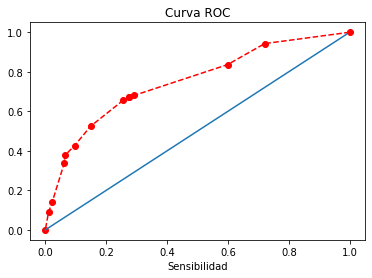

In [ ]:
%matplotlib inline
plt.plot(especifities_1, sensitivities,
         marker = "o",
         linestyle = "--",
         color = "red")
x = [i*0.01 for i in range(100)]
y = [i*0.01 for i in range(100)]
plt.plot(x,y)
plt.title("Curva ROC")
plt.xlabel("1 - Especificidad")
plt.xlabel("Sensibilidad")

In [ ]:
from sklearn import metrics
# from ggplot import *

In [ ]:
pip install ggplot

In [ ]:
espec_1, sensit, _ = metrics.roc_curve(Y_test, prob) #dividi los threshold de 0.01 en 0.01

In [ ]:
metrics.auc(espec_1, sensit)

0.7527518615534037

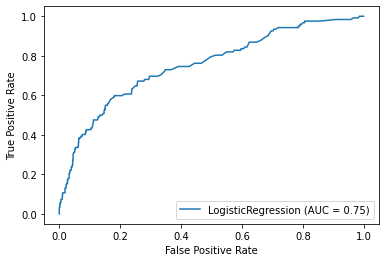

In [ ]:
metrics.plot_roc_curve(lm, X_test, Y_test)